In [76]:
from datetime import datetime
print(f"This notebook was last run on (and with data collected before): {datetime.now()}")

This notebook was last run on (and with data collected before): 2021-05-04 11:43:55.073477


In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
!wget https://raw.githubusercontent.com/project-vaccine/country_list/main/country-codes.csv
!wget https://covid.ourworldindata.org/data/vaccinations/vaccinations-by-manufacturer.csv
!wget https://covid.ourworldindata.org/data/vaccinations/locations.csv

--2021-05-04 11:43:57--  https://raw.githubusercontent.com/project-vaccine/country_list/main/country-codes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131663 (129K) [text/plain]
Saving to: ‘country-codes.csv.1’

country-codes.csv.1 100%[===================>] 128.58K  --.-KB/s    in 0.01s   

2021-05-04 11:43:57 (9.65 MB/s) - ‘country-codes.csv.1’ saved [131663/131663]

--2021-05-04 11:43:57--  https://covid.ourworldindata.org/data/vaccinations/vaccinations-by-manufacturer.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138, 2606:4700:3038::6815:e98a, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [79]:
country_vaccines_list=pd.read_csv('locations.csv', usecols=['location', 'vaccines'])
country_info=pd.read_csv('country-codes.csv', usecols=['official_name_en', 'category']).dropna()
country_info=country_info.rename(columns={"category": "status", "official_name_en": "location"})

country_vaccines_count=pd.read_csv('vaccinations-by-manufacturer.csv').dropna()

In [80]:
country_vaccines_count['date']=pd.to_datetime(country_vaccines_count['date'])

In [81]:
country_vaccines_count=country_vaccines_count.merge(country_info, on='location')

In [83]:
country_vaccines_count['daily']=country_vaccines_count.groupby(['location', 'vaccine'])['total_vaccinations'].diff().fillna(0) #.rolling(3).mean()

No handles with labels found to put in legend.


              vaccine        daily
0     Johnson&Johnson    8318783.0
1             Moderna  109097920.0
2  Oxford/AstraZeneca   15635064.0
3     Pfizer/BioNTech  188080130.0
4             Sinovac   12668302.0


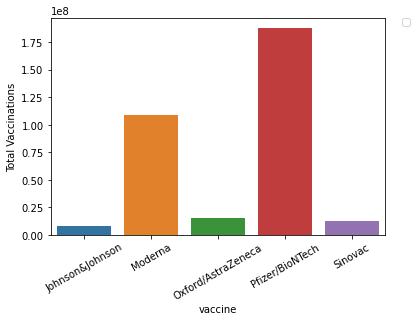

In [89]:
total_doses_by_vaccine=country_vaccines_count.groupby(['vaccine'], as_index=False)['daily'].sum()
print(total_doses_by_vaccine)
sns.barplot(x='vaccine', y='daily', data=total_doses_by_vaccine)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Total Vaccinations")
plt.savefig("output.png", bbox_inches = 'tight')

#Breakdown of Vaccine Manufacturer in each Country

In [ ]:
country_vaccines_list=country_vaccines_list.assign(vaccines=country_vaccines_list['vaccines'].str.split(', ')).explode('vaccines')
country_vaccines_list=country_vaccines_list.merge(country_info, on='location')


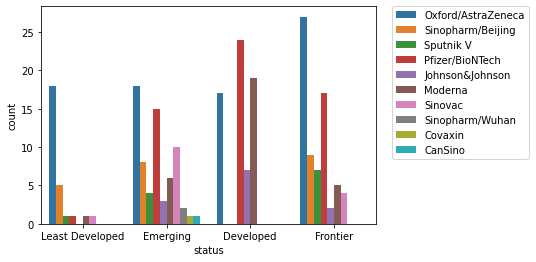

In [ ]:
sns_plot=sns.countplot(x='status', hue='vaccines', data=country_vaccines_list)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("output.png", bbox_inches = 'tight')

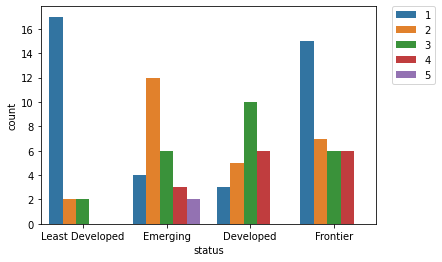

In [ ]:
output=country_vaccines_list.groupby(['location', 'status'], as_index=False).count()
sns.countplot(x='status', hue='vaccines', data=output)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("output.png", bbox_inches = 'tight')

#Breakdown of Vaccine Doses by Manufacturer in each Country

In [ ]:
vaccine_type_group=country_vaccines_count.groupby(['location', 'vaccine'], as_index=False).sum()

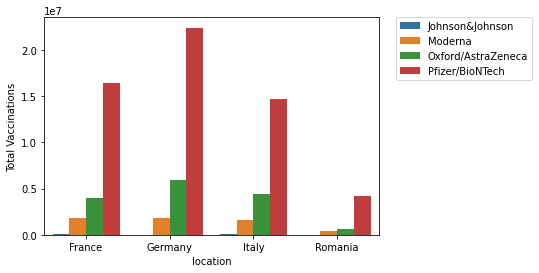

In [ ]:
sns.barplot(x="location", y="daily", hue="vaccine", data=vaccine_type_group[vaccine_type_group['location'].isin(['France', 'Germany', 'Italy', 'Romania'])])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Total Vaccinations")
plt.savefig("output.png", bbox_inches = 'tight')

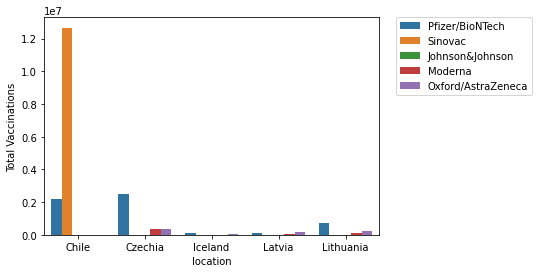

In [ ]:
sns.barplot(x="location", y="daily", hue="vaccine", data=vaccine_type_group[~vaccine_type_group['location'].isin(['France', 'Germany', 'Italy', 'Romania', 'United States'])])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Total Vaccinations")
plt.savefig("output.png", bbox_inches = 'tight')

# Vaccine Usage Breakdown over Time

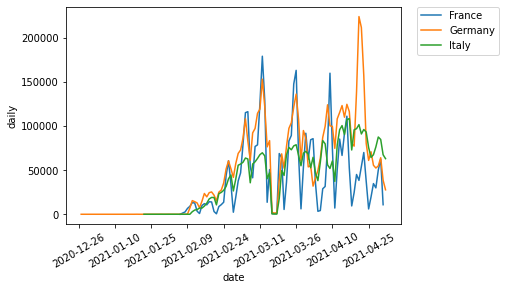

In [ ]:
fig, ax = plt.subplots()
country_vaccines_count_oxford=country_vaccines_count[country_vaccines_count['vaccine']=='Oxford/AstraZeneca']
sns.lineplot(x='date', y='daily', hue='location', data=country_vaccines_count_oxford[country_vaccines_count_oxford['location'].isin(['France', 'Germany', 'Italy'])], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

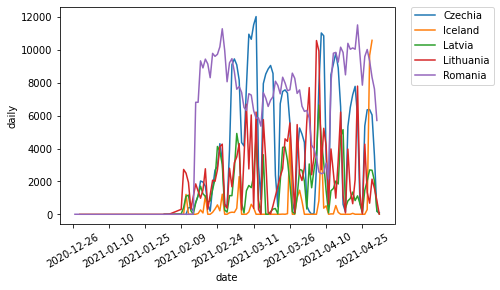

In [ ]:
fig, ax = plt.subplots()
country_vaccines_count_oxford=country_vaccines_count[country_vaccines_count['vaccine']=='Oxford/AstraZeneca']
sns.lineplot(x='date', y='daily', hue='location', data=country_vaccines_count_oxford[~country_vaccines_count_oxford['location'].isin(['France', 'Germany', 'Italy'])], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

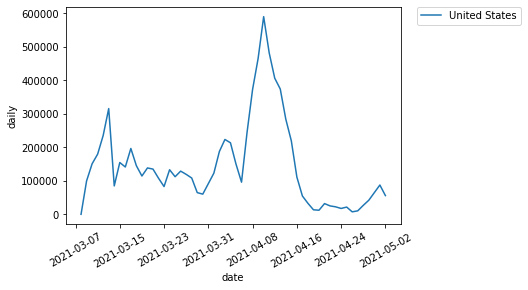

In [ ]:
fig, ax = plt.subplots()
country_vaccines_count_jnj=country_vaccines_count[(country_vaccines_count['vaccine']=='Johnson&Johnson') & (country_vaccines_count['location']=='United States')]
sns.lineplot(x='date', y='daily', hue='location', data=country_vaccines_count_jnj, ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("output.png", bbox_inches = 'tight')

No handles with labels found to put in legend.


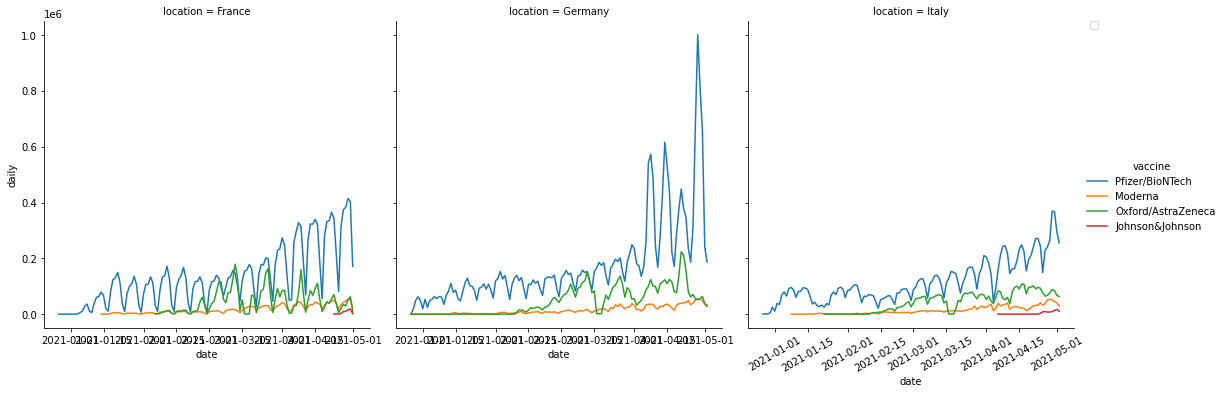

In [ ]:
# fig, ax = plt.subplots()
sns.relplot(x="date", y="daily", hue='vaccine', col='location', kind="line", data=country_vaccines_count[country_vaccines_count['location'].isin(['France', 'Germany', 'Italy'])])
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("output.png", bbox_inches = 'tight')

In [ ]:
vaccine_date_group=country_vaccines_count.groupby(['location', 'date'], as_index=False).sum()

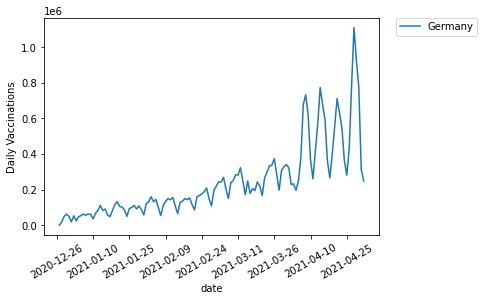

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily', hue='location', data=vaccine_date_group[vaccine_date_group['location'].isin(['Germany'])], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Daily Vaccinations")
plt.savefig("output.png", bbox_inches = 'tight')

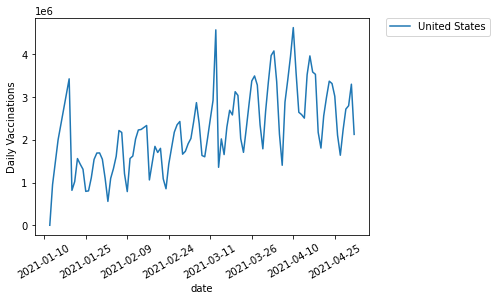

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily', hue='location', data=vaccine_date_group[vaccine_date_group['location'].isin(['United States'])], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Daily Vaccinations")
plt.savefig("output.png", bbox_inches = 'tight')

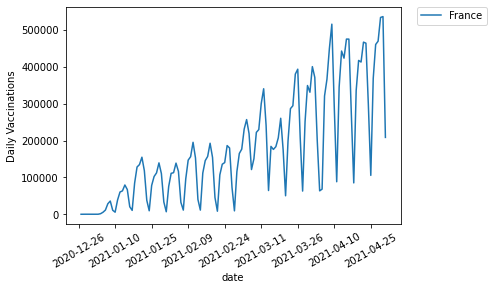

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily', hue='location', data=vaccine_date_group[vaccine_date_group['location'].isin(['France'])], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Daily Vaccinations")
plt.savefig("output.png", bbox_inches = 'tight')

# Vaccines by Emerging Countries

In [ ]:
!wget https://covid.ourworldindata.org/data/vaccinations/country_data/India.csv
!wget https://covid.ourworldindata.org/data/vaccinations/country_data/Indonesia.csv
!wget https://covid.ourworldindata.org/data/vaccinations/country_data/Bangladesh.csv
!wget https://covid.ourworldindata.org/data/vaccinations/country_data/Uruguay.csv
!wget https://covid.ourworldindata.org/data/vaccinations/country_data/Argentina.csv

--2021-05-04 08:44:45--  https://covid.ourworldindata.org/data/vaccinations/country_data/India.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138, 2606:4700:3038::6815:e989, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘India.csv’

India.csv               [ <=>                ]  13.14K  --.-KB/s    in 0.001s  

2021-05-04 08:44:45 (11.8 MB/s) - ‘India.csv’ saved [13457]

--2021-05-04 08:44:45--  https://covid.ourworldindata.org/data/vaccinations/country_data/Indonesia.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138, 2606:4700:3038::6815:e989, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Indonesi

In [ ]:
india_df=pd.read_csv('India.csv', usecols=['location', 'date', 'vaccine', 'total_vaccinations'])
indonesia_df=pd.read_csv('Indonesia.csv', usecols=['location', 'date', 'vaccine', 'total_vaccinations'])
bangladesh_df=pd.read_csv('Bangladesh.csv', usecols=['location', 'date', 'vaccine', 'total_vaccinations'])
uruguay_df=pd.read_csv('Uruguay.csv', usecols=['location', 'date', 'vaccine', 'total_vaccinations'])
argentina_df=pd.read_csv('Argentina.csv', usecols=['location', 'date', 'vaccine', 'total_vaccinations'])

In [ ]:
india_df['daily']=india_df['total_vaccinations'].diff().fillna(0)
indonesia_df['daily']=indonesia_df['total_vaccinations'].diff().fillna(0)
bangladesh_df['daily']=bangladesh_df['total_vaccinations'].diff().fillna(0)
uruguay_df['daily']=uruguay_df['total_vaccinations'].diff().fillna(0)
argentina_df['daily']=argentina_df['total_vaccinations'].diff().fillna(0)

emerging_country_df=pd.concat([india_df, indonesia_df, bangladesh_df, uruguay_df, argentina_df])
emerging_country_df['date']=pd.to_datetime(emerging_country_df['date'])

In [ ]:
oxford_emerging_df=emerging_country_df[emerging_country_df['vaccine'].str.contains('oxford', case=False)]

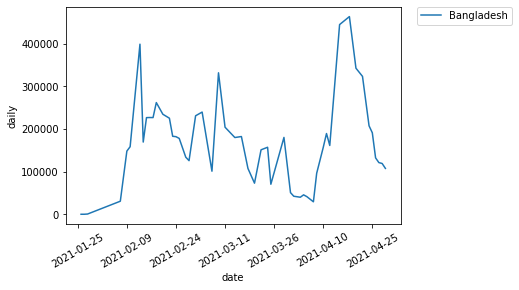

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily', hue='location', data=oxford_emerging_df[oxford_emerging_df['location']=='Bangladesh'], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("output.png", bbox_inches = 'tight')

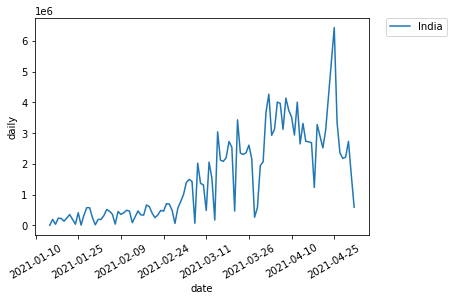

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily', hue='location', data=oxford_emerging_df[oxford_emerging_df['location']=='India'], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("output.png", bbox_inches = 'tight')

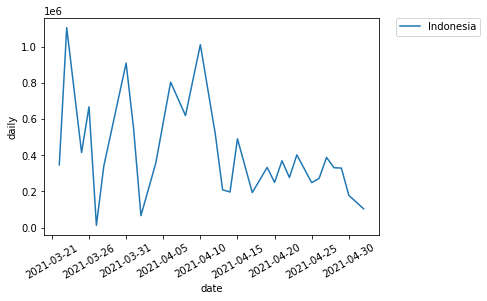

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily', hue='location', data=oxford_emerging_df[oxford_emerging_df['location']=='Indonesia'], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("output.png", bbox_inches = 'tight')

_____________________________________

In [ ]:
country_vaccines_count_jnj['Percentage Change']=country_vaccines_count_jnj['daily'].pct_change().fillna(0)
fig, ax = plt.subplots()
sns.lineplot(x='date', y='Percentage Change', hue='location', data=country_vaccines_count_jnj, ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
germany_vaccines_count_oxf=country_vaccines_count[(country_vaccines_count['vaccine']=='Oxford/AstraZeneca') & (country_vaccines_count['location']=='Germany')]
germany_vaccines_count_oxf['Percentage Change']=germany_vaccines_count_oxf['total_vaccinations'].pct_change(7).fillna(0)
fig, ax = plt.subplots()
sns.lineplot(x='date', y='Percentage Change', hue='location', data=germany_vaccines_count_oxf.iloc[-20:], ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)